# Import scientific Python functions

In [20]:
import xarray as xr
import pygmt
import pandas as pd

# Import data

Import the `mola32.nc` Mars topography data derived from the Mars Orbiter Laser Altimeter (MOLA) instrument aboard the Mars Global Surveyor (MGS) spacecraft. The resolution is 32 pixels/degree and it is built from original MOLA data product `megt90n000fb.img`

If the `mola32.nc` is local import using this code:

In [4]:
mars_data = xr.open_dataset('data/mola32.nc')
mars_data

<xarray.Dataset> Size: 133MB
Dimensions:    (latitude: 5760, longitude: 11520)
Coordinates:
  * latitude   (latitude) float32 23kB 89.98 89.95 89.92 ... -89.95 -89.98
  * longitude  (longitude) float32 46kB 0.01562 0.04688 0.07812 ... 360.0 360.0
Data variables:
    alt        (latitude, longitude) int16 133MB ...
Attributes:
    title:    MOLA Topography - 32 pixels/degree
    history:  Built from original MOLA file megt90n000fb.img

If not downloaded locally it can be found at this url:

In [2]:
url = "https://github.com/andrebelem/PlanetaryMaps/raw/main/mola32.nc"
mars_data = xr.open_dataset(url)
mars_data

## Create pygmt.grdsample

To be able to plot the data using pygmt and to make the dataset more managable, we can using `pygmt.grdsample` and downsample to 0.1º spacing.

In [14]:
mars_topo = mars_data.alt.astype(float)
mars_topo = pygmt.grdsample(grid=mars_topo, translate=True, spacing=[0.1,0.1])

grdsample [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdsample [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdsample (gmtapi_init_grdheader): Please select compatible -R and -I values
grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


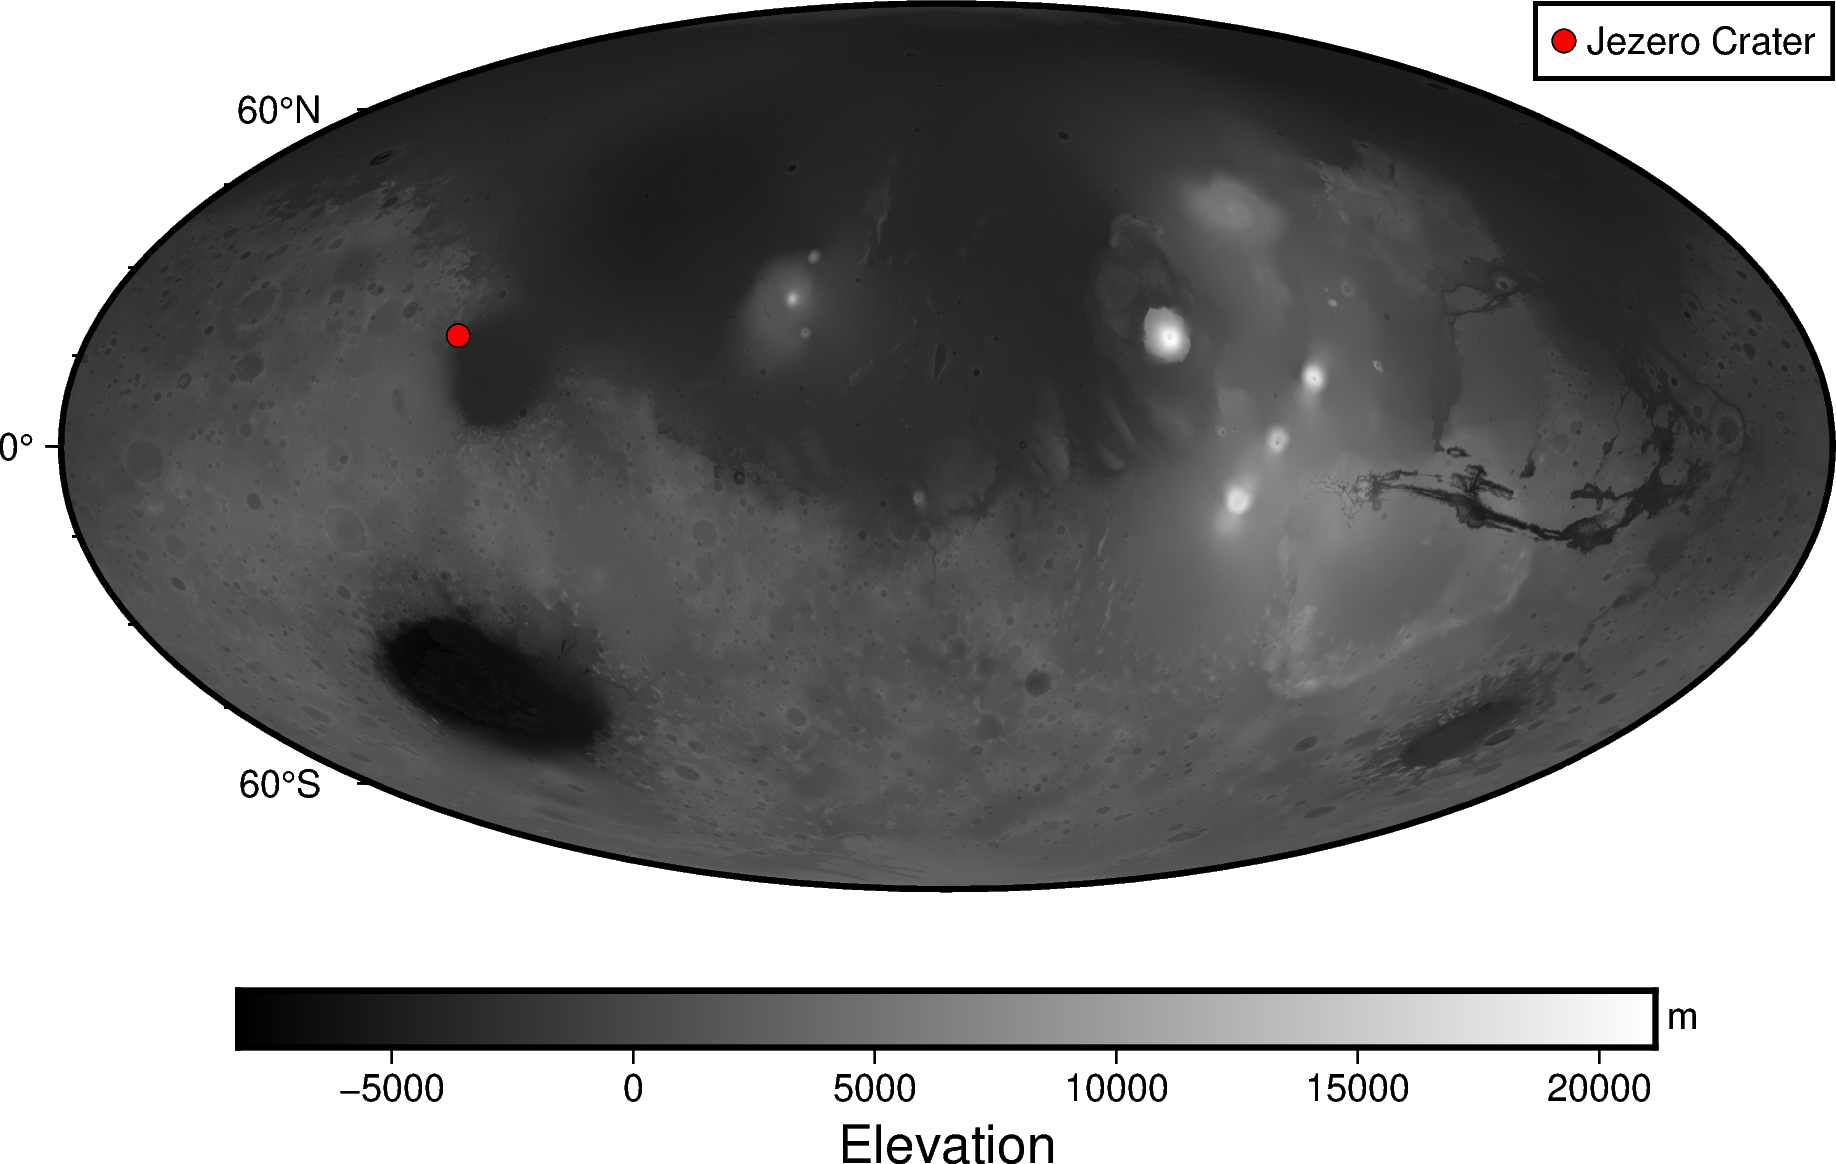

In [19]:
fig = pygmt.Figure()

fig.grdimage(grid=mars_topo,region='g',frame=True,projection='W15c',cmap='gray')
fig.colorbar(frame=['a5000','x+lElevation','y+lm'])

# Plot the position of Jezero Crater
fig.plot(
    x=77.5,
    y=18.4,
    style='c0.2c',  # 'i' for an inverted triangle, '0.5c' for the size (0.5 cm)
    color='red',  # Point color
    pen='black',  # Outline color
    label='Jezero Crater'  # Label for the legend
)

# Define the legend
fig.legend(
    position='JTR+jTR+o0.0c',  # Position: Justify Top Right, plus offset
    box='+gwhite+p1p'  # White background with a black border
)

fig.savefig('mars_paleopole_map.png', dpi=600)
fig.show()

In [24]:
M12_poles = pd.read_csv('data/Milbury2012_poles.csv')

# Split the DataFrame into three separate DataFrames based on the 'geologic_designation' values
M12_poles_C = M12_poles[M12_poles['geologic_designation'] == 'C']
M12_poles_H = M12_poles[M12_poles['geologic_designation'] == 'H']
M12_poles_N = M12_poles[M12_poles['geologic_designation'] == 'N']

M12_poles_N

,anomaly,geologic_designation,source_lon,source_lat,pole_lon,pole_lat,dipole_moment
2,T3,N,100.00,-27.00,76,2,8.700000e+15
4,T5,N,93.50,-19.00,155,62,-1.200000e+16
5,T6,N,95.50,-11.00,1,56,-6.400000e+15
6,T7,N,90.00,-10.00,309,59,-7.200000e+15
7,T8,N,104.75,-10.00,190,24,6.400000e+15
10,T11,N,115.00,-15.00,65,47,1.000000e+16
11,T12,N,118.00,-17.50,59,53,-5.500000e+15
12,T13,N,119.50,-12.75,76,45,6.700000e+15
15,S3,N,70.00,-7.50,295,52,4.300000e+15
16,S4,N,65.50,-7.00,211,75,1.400000e+16


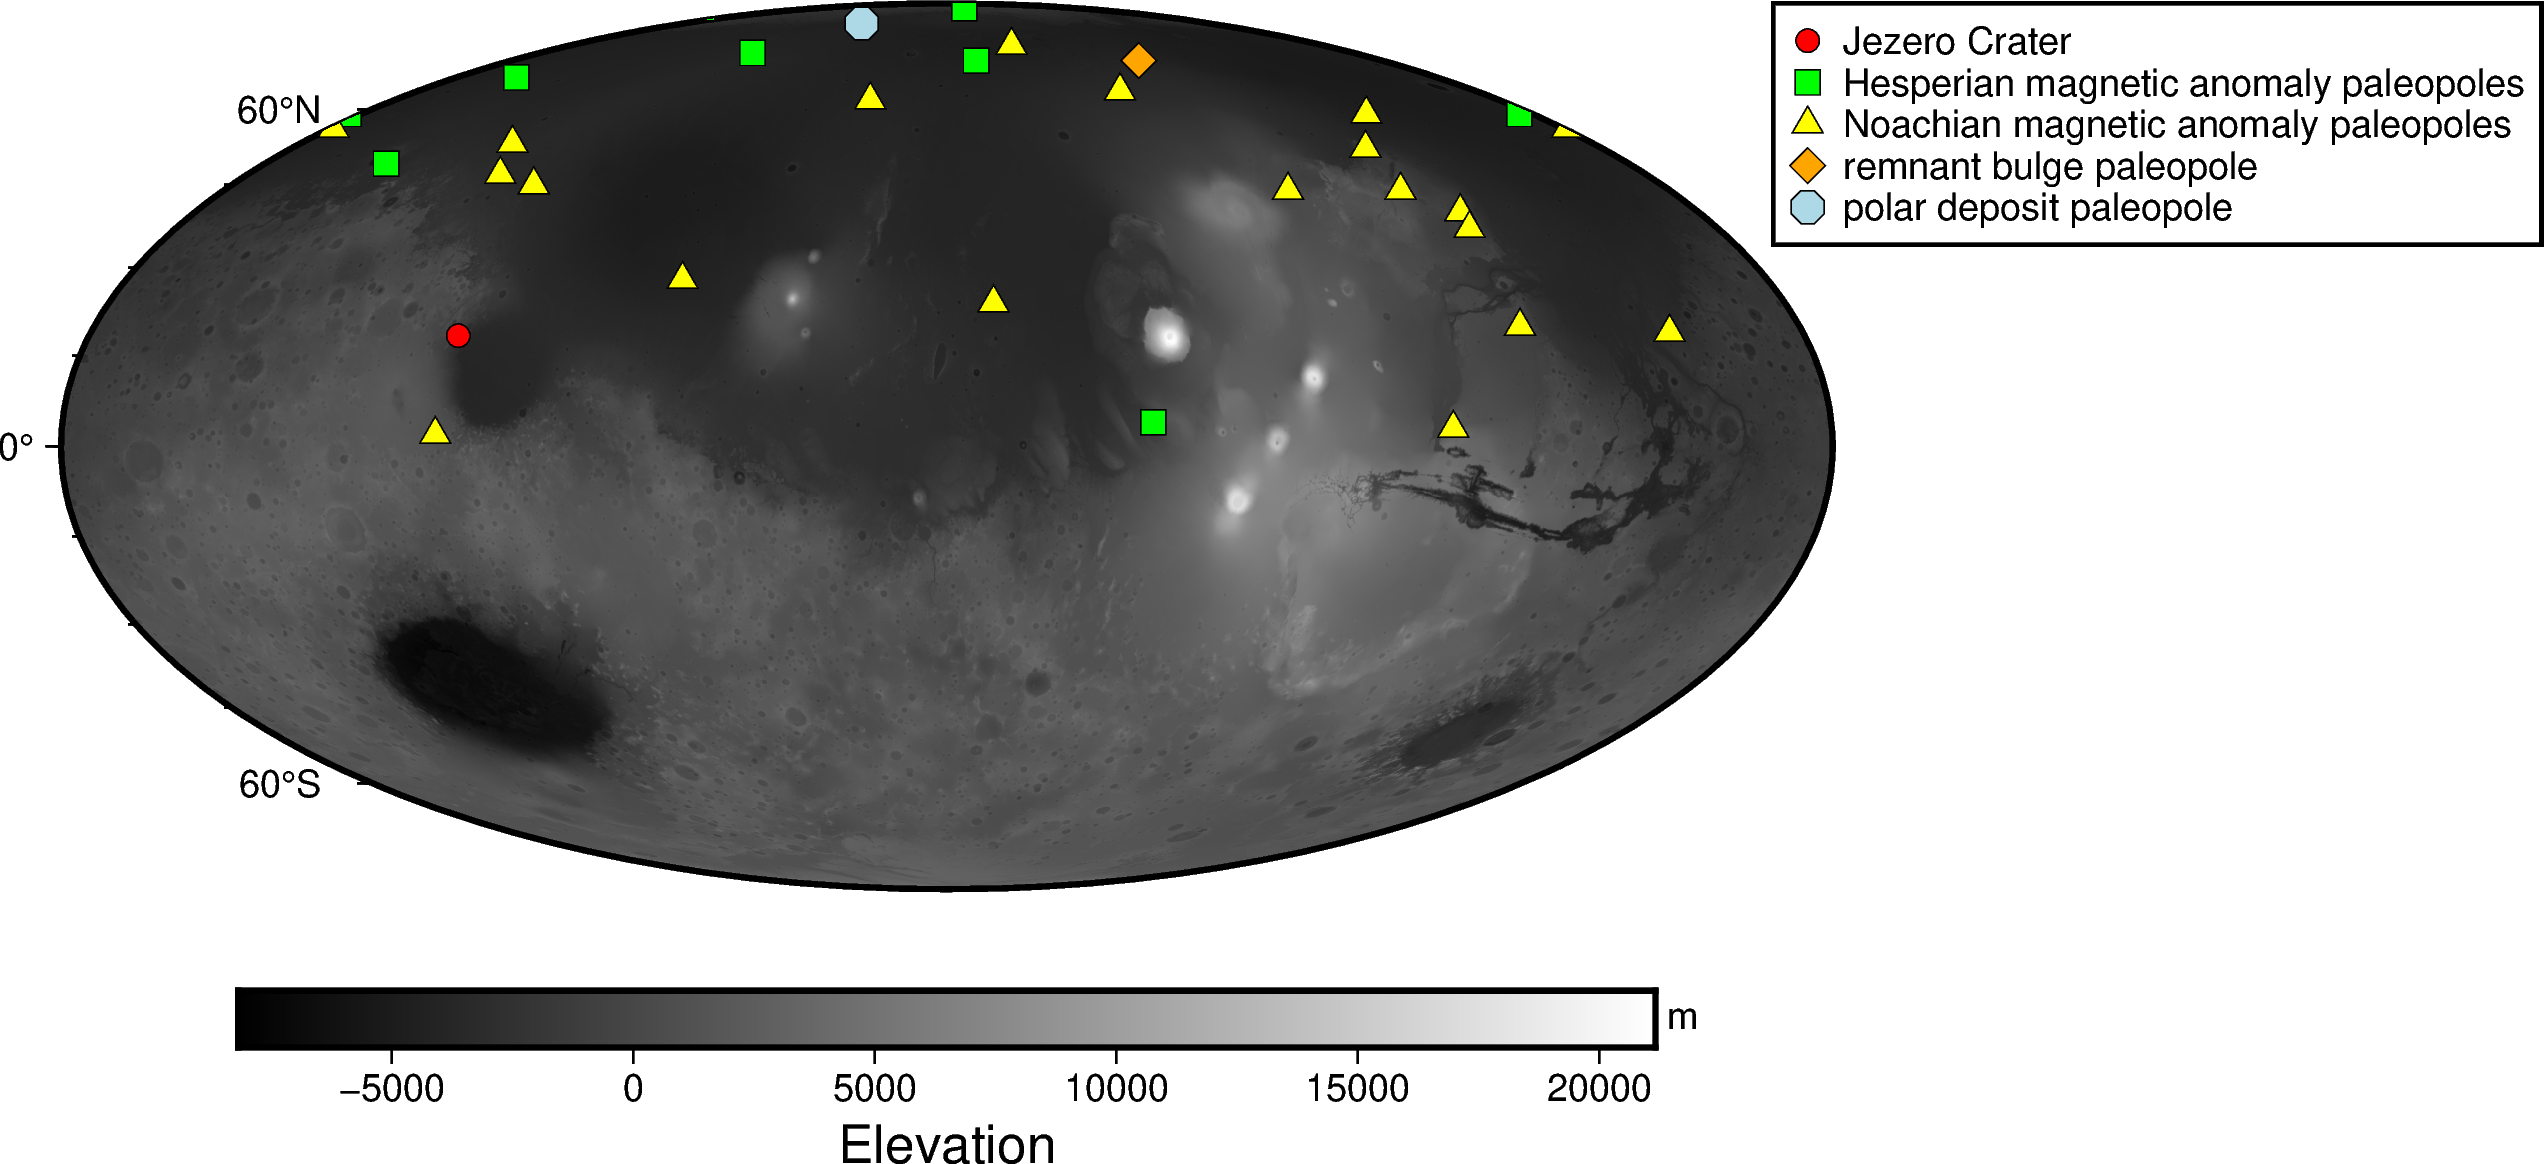

In [43]:

fig = pygmt.Figure()

fig.grdimage(grid=mars_topo, region='g', frame=True, projection='W15c', cmap='gray')
fig.colorbar(frame=['a5000', 'x+lElevation', 'y+lm'])

# Plot the position of Jezero Crater
fig.plot(
    x=77.5,
    y=18.4,
    style='c0.2c',
    color='red',
    pen='black',
    label='Jezero Crater'
)

# # Plot 'C' geologic designation points
# fig.plot(
#     x=M12_poles_C['pole_lon'],
#     y=M12_poles_C['pole_lat'],
#     style='i0.3c',  # Inverted triangle, 0.3 cm size
#     color='blue',  # Color for 'C' points
#     pen='black',
#     label='C geologic designation'
# )

# Plot 'H' geologic designation points
fig.plot(
    x=M12_poles_H['pole_lon'],
    y=M12_poles_H['pole_lat'],
    style='s0.3c',  # Square, 0.3 cm size
    color='green',  # Color for 'H' points
    pen='black',
    label='Hesperian magnetic anomaly paleopoles'
)

# Plot 'N' geologic designation points
fig.plot(
    x=M12_poles_N['pole_lon'],
    y=M12_poles_N['pole_lat'],
    style='t0.3c',  # Triangle, 0.3 cm size
    color='yellow',  # Color for 'N' points
    pen='black',
    label='Noachian magnetic anomaly paleopoles'
)

MM10_lon = 259.5
MM10_lat = 71.1 

fig.plot(
    x=MM10_lon,
    y=MM10_lat,
    style='d0.3c',
    color='orange',
    pen='black',
    label='remnant bulge paleopole'
)

# Late Hesperian Dorsa Argentea Formation polar materia
# 81.3S 302.1E
# (fixed cap radius)
K09_lon = 302.1-180
K09_lat = 81.3 

fig.plot(
    x=K09_lon,
    y=K09_lat,
    style='g0.3c',
    color='lightblue',
    pen='black',
    label='polar deposit paleopole'
)


fig.legend(
    position='JTR+jTR+o-6c/0c',  # Increase the offset to move the legend further right
    box='+gwhite+p1p'
)

fig.savefig('mars_paleopole_map.png', dpi=600)
fig.show()
